# Import pandas for create Panel Data

In [1]:
import pandas as pd

# Import matplotlib for plotting

In [2]:
import matplotlib.pyplot as plt

# Import the data files into DataFrames

In [3]:
bom_movies = pd.read_csv('bom.movie_gross.csv', index_col=0)

In [4]:
bom_movies.dropna(inplace=True)

In [5]:
rt_reviews = pd.read_csv("rt.reviews.tsv", sep = '\t', encoding='windows-1252')

In [6]:
rt_movies = pd.read_csv("rt.movie_info.tsv", sep = '\t', encoding='windows-1252')

In [7]:
rt_movies.dropna(inplace=True)

In [8]:
tmdb = pd.read_csv('tmdb.movies.csv', index_col=7)

In [9]:
tn = pd.read_csv('tn.movie_budgets.csv', index_col=2)

# Format the Dataframe to begin the aggregation processs

In [10]:
rt_movies['box_office'] = rt_movies['box_office'].str.replace(',', '')
rt_movies['box_office'] = rt_movies['box_office'].astype(int)

# Reset index and sort by index to merge the data

In [11]:
df = pd.merge(bom_movies, tmdb, on = 'title')

In [12]:
df1 = df[['studio', 'domestic_gross', 'foreign_gross', 'year', 'popularity', 'vote_average']]

In [13]:
df1.sort_index()

,studio,domestic_gross,foreign_gross,year,popularity,vote_average
title,,,,,,
'71,RAtt.,1300000.0,355000,2015,10.523,6.8
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,17.892,6.9
11-11-11,Rocket,32800.0,5700000,2011,5.196,4.3
12 Strong,WB,45800000.0,21600000,2018,13.183,5.6
12 Years a Slave,FoxS,56700000.0,131100000,2013,16.493,7.9
...,...,...,...,...,...,...
Zero Dark Thirty,Sony,95700000.0,37100000,2012,14.239,6.9
Zookeeper,Sony,80400000.0,89500000,2011,10.764,5.3
Zoolander 2,Par.,28800000.0,27900000,2016,12.997,4.7


In [14]:
tn.index.name = 'title'

In [15]:
df4 = df1.merge(tn, on='title', how='left' )

# More formatting on newly created Dataframes

1. Drop a row if a null value appears
2. Reset the index so studio becomes a column again

In [16]:
df4.dropna(inplace=True)

In [17]:
df4.reset_index()

,title,studio,domestic_gross_x,foreign_gross,year,popularity,vote_average,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,27.920,8.3,38.0,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1,27.0,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,20.340,6.0,53.0,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,28.515,6.8,15.0,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Hotel Artemis,Global Road,6700000.0,6000000,2018,14.585,5.9,15.0,"Jun 8, 2018","$15,000,000","$6,708,137","$12,758,799"
1193,Kin,LGF,5700000.0,4300000,2018,23.805,6.2,88.0,"Aug 31, 2018","$30,000,000","$5,718,096","$10,096,821"
1194,Suspiria,Amazon,2500000.0,5400000,2018,16.925,7.0,81.0,"Oct 26, 2018","$20,000,000","$2,483,472","$7,034,615"
1195,Destroyer,Annapurna,1500000.0,4000000,2018,17.815,5.9,5.0,"Dec 25, 2018","$9,000,000","$1,533,324","$3,681,096"


In [18]:
df4.drop(['domestic_gross_x', 'id'], axis = 1, inplace=True)

In [19]:
df4.drop(['release_date'], axis = 1, inplace=True)

In [20]:
 pd.to_datetime(df4.year, format='%Y')

title
Toy Story 3                  2010-01-01
Inception                    2010-01-01
Shrek Forever After          2010-01-01
The Twilight Saga: Eclipse   2010-01-01
Iron Man 2                   2010-01-01
                                ...    
Hotel Artemis                2018-01-01
Kin                          2018-01-01
Suspiria                     2018-01-01
Destroyer                    2018-01-01
Bilal: A New Breed of Hero   2018-01-01
Name: year, Length: 1197, dtype: datetime64[ns]

In [21]:
df4['production_budget'] = df4['production_budget'].str.replace(',', '')
df4['production_budget'] = df4['production_budget'].str.replace('$', '')
df4['production_budget'] = df4['production_budget'].astype(int)

In [22]:
df4['domestic_gross_y'] = df4['domestic_gross_y'].str.replace(',', '')
df4['domestic_gross_y'] = df4['domestic_gross_y'].str.replace('$', '')
df4['domestic_gross_y'] = df4['domestic_gross_y'].astype(int)

In [23]:
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace(',', '')
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace('$', '')
df4['worldwide_gross'] = df4['worldwide_gross'].astype(int)

In [24]:
df4.drop_duplicates(inplace=True)

In [25]:
df4= df4.rename(columns={'domestic_gross_y':'domestic_gross'})

In [26]:
df4 = df4.reset_index()

# Filter dataframe 4 by movies that have grossed 400,000,000 dollars or more

In [27]:
df5 = df4[df4['worldwide_gross'] > 400000000]

Pull only columns production and revenue and sort by studio column

In [63]:
df5[['production_budget', 'worldwide_gross', 'studio']].groupby(by='studio').sum().sort_values(by=['production_budget'], ascending=False)

,production_budget,worldwide_gross
studio,,
BV,6.831200e+09,3.176650e+10
WB,4.166000e+09,1.731940e+10
Fox,2.937000e+09,1.378231e+10
Uni.,1.974000e+09,1.440055e+10
Sony,1.440000e+09,6.862027e+09
Par.,1.394000e+09,4.907887e+09
P/DW,9.500000e+08,4.341653e+09
LG,5.150000e+08,3.384705e+09
Wein.,1.000000e+08,4.499483e+08


# Some studios are listed in different formats because they came from different files, so we have to rename them in a standard convention. 

1. The studios Warner bros and LionsGate are mentioned in different ways so convert them into a single convention.
2. Find the number of unique studios.

In [29]:
df5['studio'] = df5['studio'].replace('^WB.*', 'WB', regex=True)

<ipython-input-29-1f0f1b6a0d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['studio'] = df5['studio'].replace('^WB.*', 'WB', regex=True)


In [30]:
df5['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'LGF',
       'Wein.', 'LG/S'], dtype=object)

In [31]:
df5['studio'] = df5['studio'].replace('^LG.*', 'LG', regex=True)

<ipython-input-31-8fa8652866ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['studio'] = df5['studio'].replace('^LG.*', 'LG', regex=True)


In [32]:
df5['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'LG',
       'Wein.'], dtype=object)

# Group the new dataframe by studio and average all columns and sort by Worldwide_gross so to graph them.

In [55]:
x = list(df5['studio'].unique())

In [56]:
x

['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'LG', 'Wein.']

In [57]:
revenue = df5.loc[:, df5.columns != 'year'].groupby(by = 'studio').mean().sort_values(by=['worldwide_gross'], ascending=False)['worldwide_gross']

In [58]:
expense = df5.loc[:, df5.columns != 'year'].groupby(by = 'studio').mean().sort_values(by=['production_budget'], ascending=False)['production_budget']

In [59]:
expense.mean()

137083645.6582633

# Make a stacked bar chart for movies that made 400,000,000 or more depicting the world_gross and budget ratio.

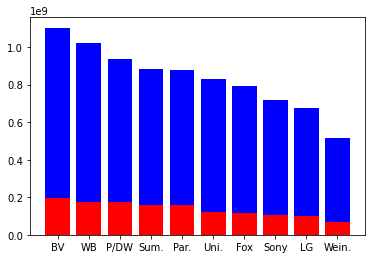

In [60]:
plt.bar(x, expense, color='r')
plt.bar(x, revenue, bottom=expense, color='b')
plt.show()

In [39]:
df20 =  df5.loc[:, df5.columns != 'year'].groupby(by = 'studio').sum().sort_values(by=['worldwide_gross'], ascending=False)[[ 'production_budget', 'worldwide_gross']]

In [40]:
df5[['production_budget','worldwide_gross', 'studio']].groupby(by='studio').mean()

,production_budget,worldwide_gross
studio,,
BV,1.951771e+08,9.076144e+08
Fox,1.223750e+08,5.742631e+08
LG,1.030000e+08,6.769409e+08
P/DW,1.583333e+08,7.236088e+08
Par.,1.742500e+08,6.134858e+08
Sony,1.600000e+08,7.624474e+08
Sum.,6.800000e+07,7.061028e+08
Uni.,1.161176e+08,8.470909e+08
WB,1.735833e+08,7.216417e+08


# Create a bar chart for movie ratings and the average revenue they generated 

In [41]:
ratings = rt_movies.groupby(by='rating').mean().sort_values(by=['box_office'], ascending=False)

In [42]:
ratings.drop(['id'], inplace=True, axis = 1)

In [43]:
ratings.reset_index(inplace=True)

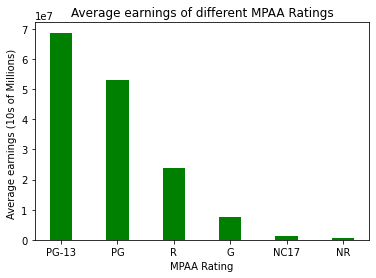

In [44]:
x = ratings.rating
y = ratings.box_office
plt.bar(x, y, color ='green',
        width = 0.4)
 
plt.xlabel("MPAA Rating")
plt.ylabel("Average earnings (10s of Millions) ")
plt.title("Average earnings of different MPAA Ratings")
plt.show()

# Filter the rotten tomatoes dataframe to find the average movie runtime

In [45]:
rt_movies['runtime'] = rt_movies['runtime'].str[:-8].astype(int)

In [46]:
rt_movies['runtime'].mean()

106.66382978723404

1.Im
2.create a new column that states 'Y' if the runtime is greater than average runtime and 'N' if runtime is not greater than the average runtime

In [47]:
import numpy as np

In [48]:
rt_movies['long'] = np.where(rt_movies['runtime']> 107, 'Y', 'N')

In [49]:
long = rt_movies[['box_office', 'rating', 'long']].groupby(by = 'long').mean()

In [50]:
long.reset_index(inplace=True)

In [51]:
y = long.box_office

In [52]:
x = long.long

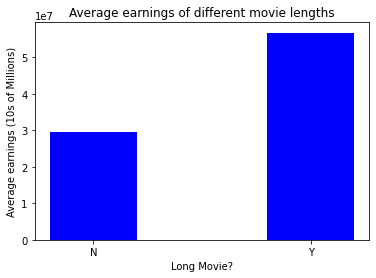

In [53]:
plt.bar(x, y, color ='blue',
        width = 0.4)
 
plt.xlabel("Long Movie?")
plt.ylabel("Average earnings (10s of Millions)")
plt.title("Average earnings of different movie lengths")
plt.show()

In [104]:
movie_budget_df = df4[df4['worldwide_gross'] > 400000000]
movie_budget_df = movie_budget_df[['production_budget', 'worldwide_gross', 'studio']].groupby(by='studio').sum().sort_values(by=['production_budget'], ascending=False)
movie_budget_df.reset_index(inplace=True)
movie_budget_df

,studio,production_budget,worldwide_gross
0,BV,6.831200e+09,3.176650e+10
1,WB,3.271000e+09,1.324274e+10
2,Fox,2.937000e+09,1.378231e+10
3,Uni.,1.974000e+09,1.440055e+10
4,Sony,1.440000e+09,6.862027e+09
5,Par.,1.394000e+09,4.907887e+09
6,P/DW,9.500000e+08,4.341653e+09
7,WB (NL),8.950000e+08,4.076665e+09
8,LGF,4.950000e+08,2.958353e+09
9,Wein.,1.000000e+08,4.499483e+08


In [105]:
movie_budget_df['studio'] = movie_budget_df['studio'].replace('^WB.*', 'WB', regex=True)
movie_budget_df['studio'] = movie_budget_df['studio'].replace('^LG.*', 'LG', regex=True)
movie_budget_df['studio']

0        BV
1        WB
2       Fox
3      Uni.
4      Sony
5      Par.
6      P/DW
7        WB
8        LG
9     Wein.
10     Sum.
11       LG
Name: studio, dtype: object

In [106]:
movie_budget_df = movie_budget_df.groupby(movie_budget_df["studio"], sort=False).sum()
movie_budget_df.reset_index()

,studio,production_budget,worldwide_gross
0,BV,6.831200e+09,3.176650e+10
1,WB,4.166000e+09,1.731940e+10
2,Fox,2.937000e+09,1.378231e+10
3,Uni.,1.974000e+09,1.440055e+10
4,Sony,1.440000e+09,6.862027e+09
5,Par.,1.394000e+09,4.907887e+09
6,P/DW,9.500000e+08,4.341653e+09
7,LG,5.150000e+08,3.384705e+09
8,Wein.,1.000000e+08,4.499483e+08
9,Sum.,6.800000e+07,7.061028e+08


In [72]:
#Our X-Values will be the studios
x = list(movie_budget_df.index)

#We need 2 bars to make a stacked bar chart. The revenue will on average be greater than the expense.
#Because of this, we will graph the expense on top of the revenue
revenue_y = movie_budget_df.groupby(by = 'studio').mean().sort_values(by=['worldwide_gross'], ascending=False)['worldwide_gross']
expense_y = movie_budget_df.groupby(by = 'studio').mean().sort_values(by=['production_budget'], ascending=False)['production_budget']


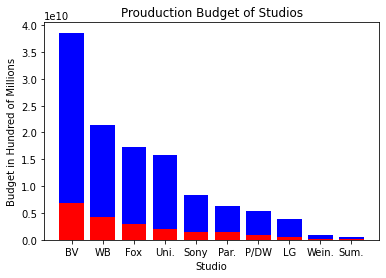

In [73]:
plt.bar(x, expense_y, color='r')
plt.bar(x, revenue_y, bottom=expense_y, color='b')
plt.xlabel("Studio")
plt.ylabel("Budget in Hundred of Millions")
plt.title("Prouduction Budget of Studios")
plt.show()

In [93]:
movie_budget_df = df4[df4['worldwide_gross'] > 400000000]
#movie_budget_df = movie_budget_df[['production_budget', 'worldwide_gross', 'studio']].groupby(by='studio')

In [94]:
#movie_budget_df.reset_index(inplace=True)
movie_budget_df


,title,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,2010,24.445,7.7,200000000,415004880,1068879522
1,Inception,WB,535700000,2010,27.920,8.3,160000000,292576195,835524642
2,Shrek Forever After,P/DW,513900000,2010,15.041,6.1,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,20.340,6.0,68000000,300531751,706102828
4,Iron Man 2,Par.,311500000,2010,28.515,6.8,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...
1010,Ant-Man and the Wasp,BV,406000000,2018,44.729,7.0,130000000,216648740,623144660
1011,Ready Player One,WB,445200000,2018,30.029,7.6,150000000,137690172,579290136
1012,The Meg,WB,384800000,2018,31.397,5.9,178000000,145443742,529530715
1013,Hotel Transylvania 3: Summer Vacation,Sony,361100000,2018,26.815,6.8,65000000,167500092,527079962


In [95]:
movie_budget_df['studio'] = movie_budget_df['studio'].replace('^WB.*', 'WB', regex=True)
movie_budget_df['studio'] = movie_budget_df['studio'].replace('^LG.*', 'LG', regex=True)
movie_budget_df

<ipython-input-95-26c450512427>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budget_df['studio'] = movie_budget_df['studio'].replace('^WB.*', 'WB', regex=True)
<ipython-input-95-26c450512427>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budget_df['studio'] = movie_budget_df['studio'].replace('^LG.*', 'LG', regex=True)


,title,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,2010,24.445,7.7,200000000,415004880,1068879522
1,Inception,WB,535700000,2010,27.920,8.3,160000000,292576195,835524642
2,Shrek Forever After,P/DW,513900000,2010,15.041,6.1,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,20.340,6.0,68000000,300531751,706102828
4,Iron Man 2,Par.,311500000,2010,28.515,6.8,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...
1010,Ant-Man and the Wasp,BV,406000000,2018,44.729,7.0,130000000,216648740,623144660
1011,Ready Player One,WB,445200000,2018,30.029,7.6,150000000,137690172,579290136
1012,The Meg,WB,384800000,2018,31.397,5.9,178000000,145443742,529530715
1013,Hotel Transylvania 3: Summer Vacation,Sony,361100000,2018,26.815,6.8,65000000,167500092,527079962


In [96]:
new_df = movie_budget_df[movie_budget_df['']]

,year,popularity,vote_average,production_budget,domestic_gross,worldwide_gross
studio,,,,,,
BV,70512,940.724,246.2,6.831200e+09,1.190611e+10,3.176650e+10
WB,48357,654.631,164.8,4.166000e+09,6.343742e+09,1.731940e+10
P/DW,12065,94.260,39.4,9.500000e+08,1.339610e+09,4.341653e+09
Sum.,2010,20.340,6.0,6.800000e+07,3.005318e+08,7.061028e+08
Par.,16110,218.389,54.1,1.394000e+09,1.615424e+09,4.907887e+09
Uni.,34248,312.440,110.6,1.974000e+09,4.593719e+09,1.440055e+10
Fox,48346,556.454,167.4,2.937000e+09,4.137738e+09,1.378231e+10
Sony,18131,221.897,59.6,1.440000e+09,2.187843e+09,6.862027e+09
LG,10070,103.998,36.0,5.150000e+08,1.602640e+09,3.384705e+09
